In [1]:
import numpy as np # Pour la manipulation de tableaux
from keras.applications import  resnet50
from sklearn import metrics 
import os

import pandas as pd # Pour manipuler des DataFrames pandas

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from keras.models import Sequential # Pour construire un réseau de neurones
from keras.layers import Dense, Conv2D # Pour instancier une couche dense
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model
import cv2
import keras
from numpy.random import seed
import tensorflow

from keras.preprocessing.image import ImageDataGenerator
import itertools # Pour créer des iterateurs

from sklearn import linear_model, preprocessing 



%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:
#df=pd.read_csv("/home/marcpozzo/Desktop/c3po/Images_aquises/generateur.csv")
df=pd.read_csv("generateur.csv")
df.drop('labels',inplace=True,axis=1)
df.head()

,class,img_paths
0,oiseau,Rec_images/DSCF0029_incertain_0.JPG
1,autre,Rec_images/DSCF0029_ground_1.JPG
2,corneille,Rec_images/DSCF0180_corneille_2.JPG
3,corneille,Rec_images/DSCF0180_corneille_3.JPG
4,pigeon,Rec_images/DSCF0258_pigeon_4.JPG


In [3]:
#df=df[(df["class"]=='corneille') | (df["class"]=='pigeon') | (df["class"]=='faisan')   ]
df["class"].unique()
for c in df:
    print(''+c+':',len(df[c].unique()))
df["class"].unique()

class: 12
img_paths: 6220


array(['oiseau', 'autre', 'corneille', 'pigeon', 'pie', 'chat', 'abeille',
       'chevreuil', 'lapin', 'faisan', 'sanglier', 'cheval'], dtype=object)

In [4]:
All_Unique=df["class"].unique()
Utilisable=[]
for i in df["class"].unique():
    if df["class"][df["class"]==i].count()>100:
        Utilisable.append(i)
Utilisable
Non_Utilisable=set(All_Unique)-set(Utilisable)
Non_Utilisable
for i in Non_Utilisable:
    df=df[df["class"]!=i]
df=df[df["class"]!="oiseau"]  
df["class"].unique()

array(['autre', 'corneille', 'pigeon', 'chevreuil', 'lapin', 'faisan'],
      dtype=object)

In [5]:
os.path.join("/home/marcpozzo/Desktop/c3po/Images_aquises/","Rec_images/DSCF0029_ground_1.JPG")
for i in range(len(df["class"])):
    df["img_paths"].iloc[i]=os.path.join("/home/marcpozzo/Desktop/c3po/Images_aquises/",df["img_paths"].iloc[i])
    
df.head()


,class,img_paths
1,autre,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...
2,corneille,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...
3,corneille,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...
4,pigeon,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...
5,autre,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...


In [165]:
df["class"] = df["class"].astype(str)
data_train=df.iloc[:1500]
data_test=df.iloc[1500:]
data_train,data_test=train_test_split(df,test_size=0.25,random_state=42)
data_train.shape

(4475, 2)

In [167]:
print( len(train[train["class"]=="corneille"]) / (len(train  )) ,     len(test[test["class"]=="corneille"]) / (len(test  )       ) )
print( len(train[train["class"]=="pigeon"]) / (len(train  )) ,     len(test[test["class"]=="pigeon"]) / (len(test  )       ) )
print( len(train[train["class"]=="faisan"]) / (len(train  )) ,     len(test[test["class"]=="faisan"]) / (len(test  )       ) )

0.17997066834276138 0.1800670016750419
0.138696836371255 0.1390284757118928
0.056149172428242196 0.05611390284757119


Found 4773 validated image filenames belonging to 6 classes.
Found 1194 validated image filenames belonging to 6 classes.
Epoch 1/50
11/11 [==============================] - 3s 280ms/step - loss: 6.9716 - accuracy: 0.4211 - val_loss: 2.8316 - val_accuracy: 0.3425
Epoch 2/50
11/11 [==============================] - 3s 272ms/step - loss: 1.9301 - accuracy: 0.5310 - val_loss: 1.3105 - val_accuracy: 0.6461
Epoch 3/50
11/11 [==============================] - 3s 266ms/step - loss: 1.1765 - accuracy: 0.6540 - val_loss: 1.0613 - val_accuracy: 0.6713
Epoch 4/50
11/11 [==============================] - 3s 263ms/step - loss: 0.9390 - accuracy: 0.6995 - val_loss: 0.8673 - val_accuracy: 0.7063
Epoch 5/50
11/11 [==============================] - 3s 265ms/step - loss: 0.8303 - accuracy: 0.7441 - val_loss: 0.9732 - val_accuracy: 0.7481
Epoch 6/50
11/11 [==============================] - 3s 273ms/step - loss: 0.7508 - accuracy: 0.7668 - val_loss: 0.7693 - val_accuracy: 0.7758
Epoch 7/50
11/11 [========

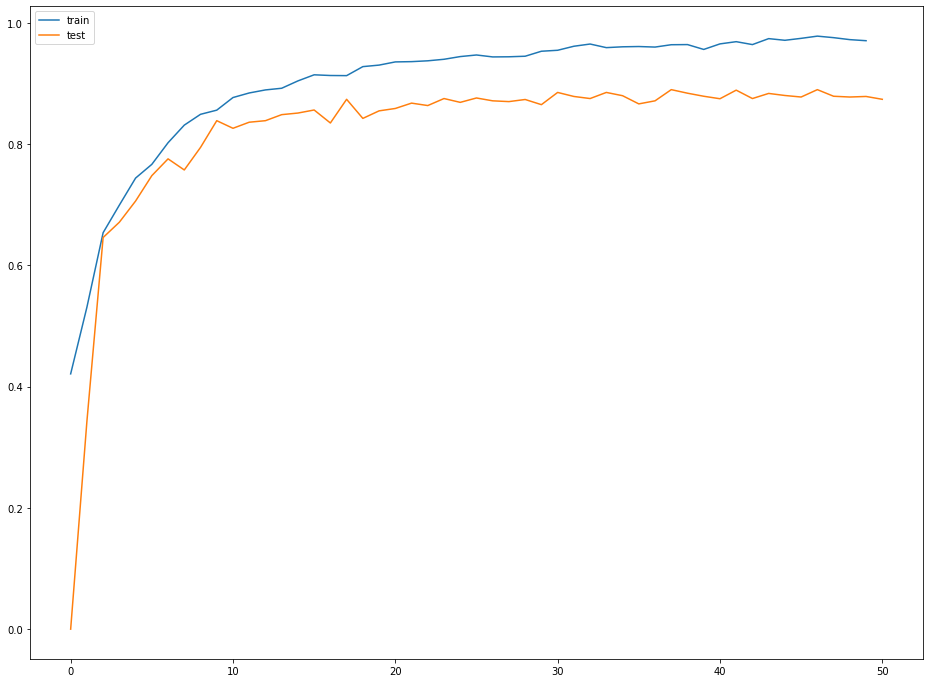

In [6]:
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

epochs=50
batch_size = 400

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=0.2,random_state=42)


train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        #rotation_range = 10,
        #zoom_range = 1.1,
        horizontal_flip = False
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)




train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)



lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = 0.2)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 6,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)
#lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation




history=lenet.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)
                          




train_acc=[]
test_acc=[]
train_acc=history.history['accuracy']
test_acc=(history.history['val_accuracy'])
test_acc.insert(0,0)
print( len(test_acc),len(train_acc) )

plt.figure(figsize=(16,12))
plt.plot(train_acc,label="train");
#plt.plot(train_acc,label="train");
#plt.labels("entrainement")
plt.plot(test_acc,label="test");
plt.legend()
print(len(test_acc),len(train_acc))